In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from sklearn.linear_model import LinearRegression
import math
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [3]:
# Load your dataset
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Loading the data
data1 = pd.read_csv('gdrive/MyDrive/colab notebooks/fraudTest.csv')
data2 = pd.read_csv('gdrive/MyDrive/colab notebooks/fraudTrain.csv')
# df = pd.read_csv('./data/creditcard.csv')
# importing the train and test data sets


In [5]:
data1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
data2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# concatanating the two data sets together

data = pd.concat([data1, data2])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [8]:
# taking only the first 100,000 data points to make it easier to do computations on

data = data.sample(frac=1, random_state=1).reset_index()
data = data.head(n=100000)
data.is_fraud.value_counts()

0    99478
1      522
Name: is_fraud, dtype: int64

In [9]:
# doing some prelimenary adjustments to data set
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('trans_num', axis=1)
data = data.drop('first', axis=1)
data = data.drop('last', axis=1)
data = data.drop('street', axis=1)
data = data.drop('city', axis=1)

In [10]:
# calculating distance between credit card holder location and location of merchant

data['distance'] = np.sqrt((data['lat'] - data['merch_lat'])**2 + (data['long'] - data['merch_long'])**2)

In [11]:
# converting to date time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [12]:
# pulling the hour for a variable
def pull_hour(ts):
    return ts.hour
data['hour'] = data['trans_date_trans_time'].apply(pull_hour)

In [13]:
# using unix time we are going to calculate the sum of transaction amounts in past 30 days
# we will create two variables from this, first sum of transactions in 30 days
# next will be a interaction based variable between current purchase amount / 30 day total
# this will help measure if this transaction is out of the ordinary



# function to calculate last 30 day spending
def sum_30_day(unixtime, cc_num):
    unixstamp = unixtime
    minus30 = unixstamp - 2629743
    ccnum = cc_num
    sumtable = data.loc[(data["cc_num"] == ccnum) & (data['unix_time'] < unixstamp) & (data['unix_time'] > minus30)]
    history30 = sumtable['amt'].sum()
    return history30


# running function and creating a new variable for it
data['history_30'] = data.apply(lambda x: sum_30_day(x.unix_time, x.cc_num), axis=1)


# measuring interaction effect with amt in new variable
data['interaction_30'] = data['history_30'] / data['amt']

In [14]:
# dropping non categorical variables in preperation for regression modeling

data = data.drop('trans_date_trans_time', axis=1)
data = data.drop('state', axis=1)
data = data.drop('merchant', axis=1)
data = data.drop('job', axis=1)
data = data.drop('dob', axis=1)
data = data.drop('category', axis=1)
data = data.drop('gender', axis=1)
data = data.drop('index', axis=1)

Text(0.5, 1.0, 'Correlation')

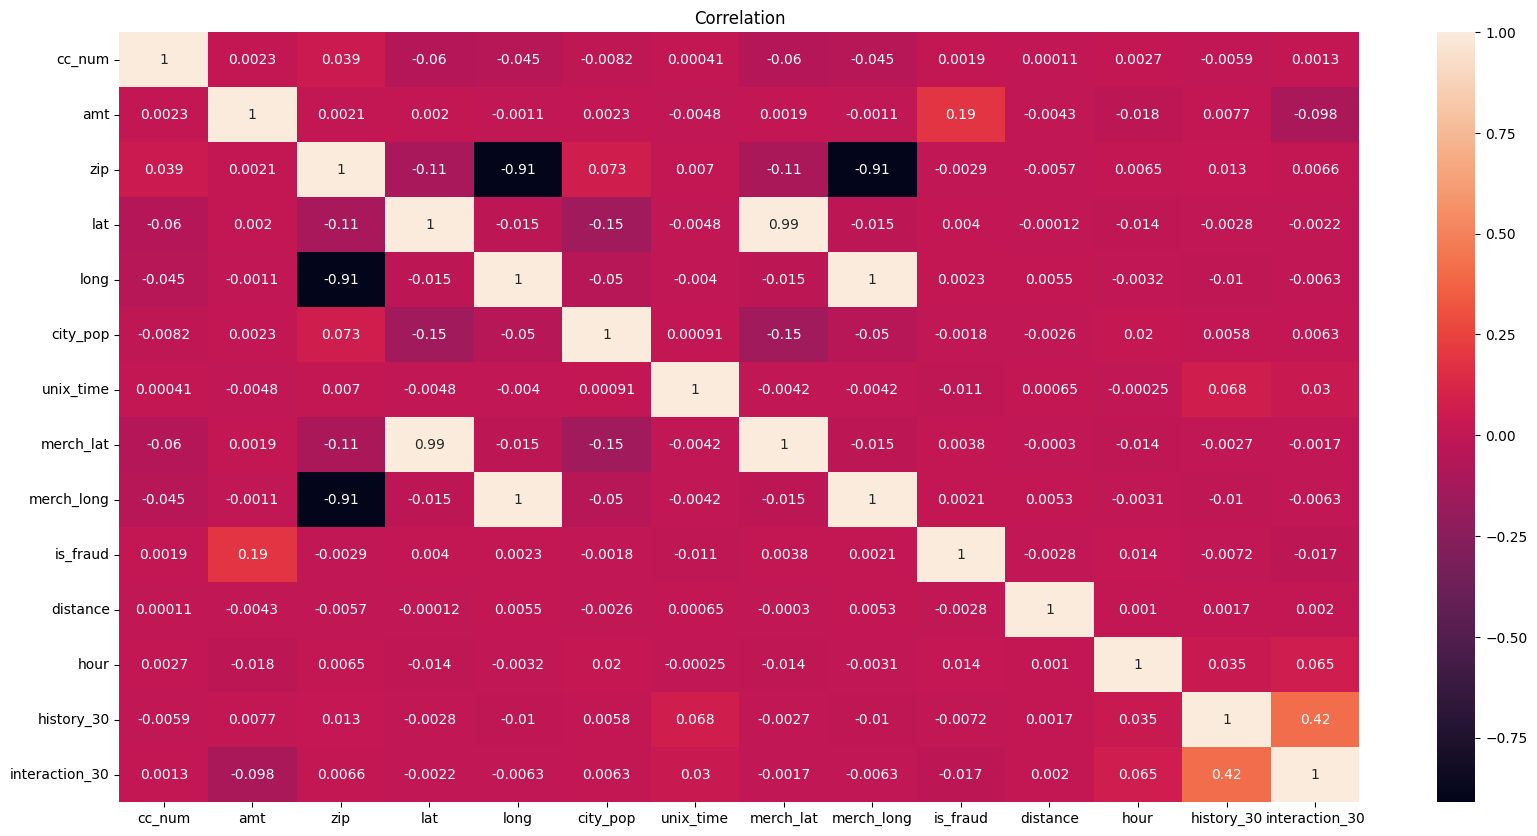

In [15]:
# creating a correlation heatmap
# using this we will check for any multicollinearity issues
# multicollinearity is when two variables have a correlation >0.7 with eachother


fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True).set_title('Correlation')

In [16]:
# there is multicollinearity issues with our non generated predictors such as lat longs, we will drop all of these

#data = data.drop('cc_num', axis=1)
data = data.drop('zip', axis=1)
data = data.drop('lat', axis=1)
data = data.drop('long', axis=1)
data = data.drop('unix_time', axis=1)
data = data.drop('merch_lat', axis=1)
data = data.drop('merch_long', axis=1)
data = data.drop('city_pop', axis=1)

Text(0.5, 1.0, 'Correlation')

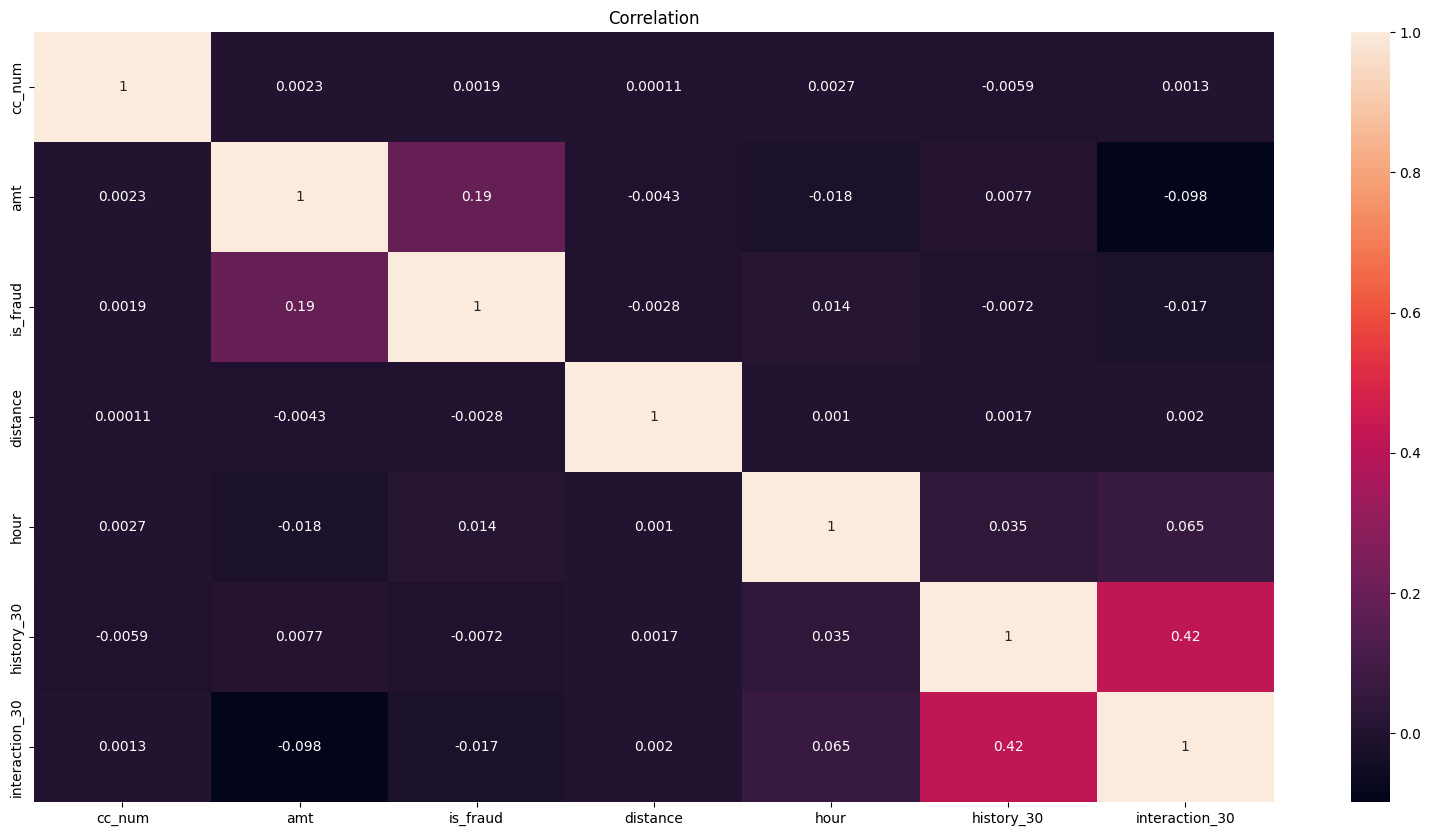

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True).set_title('Correlation')

In [18]:
# all the multicollinearity issues are fixed, we are going to begin our fitting process with the data

# we are going to use a logistic regression algorithim for this binary classification

# we will then measure using an accuracy score to see if our model is working

y = data['is_fraud']
x = data.drop('is_fraud', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)

print(accuracy)
print (x_test)

0.99465
                    cc_num     amt  distance  hour  history_30  interaction_30
43660        4481131401752   50.43  0.998138     4        0.00        0.000000
87278      377026671291680    8.07  0.645259    14      358.10       44.374226
14317     4607072969078276   70.97  1.329134    14      545.49        7.686205
81932     4173950183554608   31.24  0.470538     4      192.17        6.151408
95321  4040099974063068803   98.60  1.205696     8      310.23        3.146349
...                    ...     ...       ...   ...         ...             ...
73441     3500969075198072  105.41  1.070004    23      160.39        1.521582
1341        30153452207526   15.37  0.893008    12      620.66       40.381262
71987        4561892980175   39.02  1.073637     2      140.14        3.591492
26910        4586260469584    3.20  0.316339    16      825.15      257.859375
24890     4633065159406313  119.55  0.714269    17       53.53        0.447762

[20000 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
